C:\Users\micha\studium\git-studium\set_eye_tracking_cooking_recipes\set_eye_tracking_cooking_recipes\entities\test_data.py:45: DtypeWarning: Columns (37,38,65,66,67,68,69,70,72,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='\t')


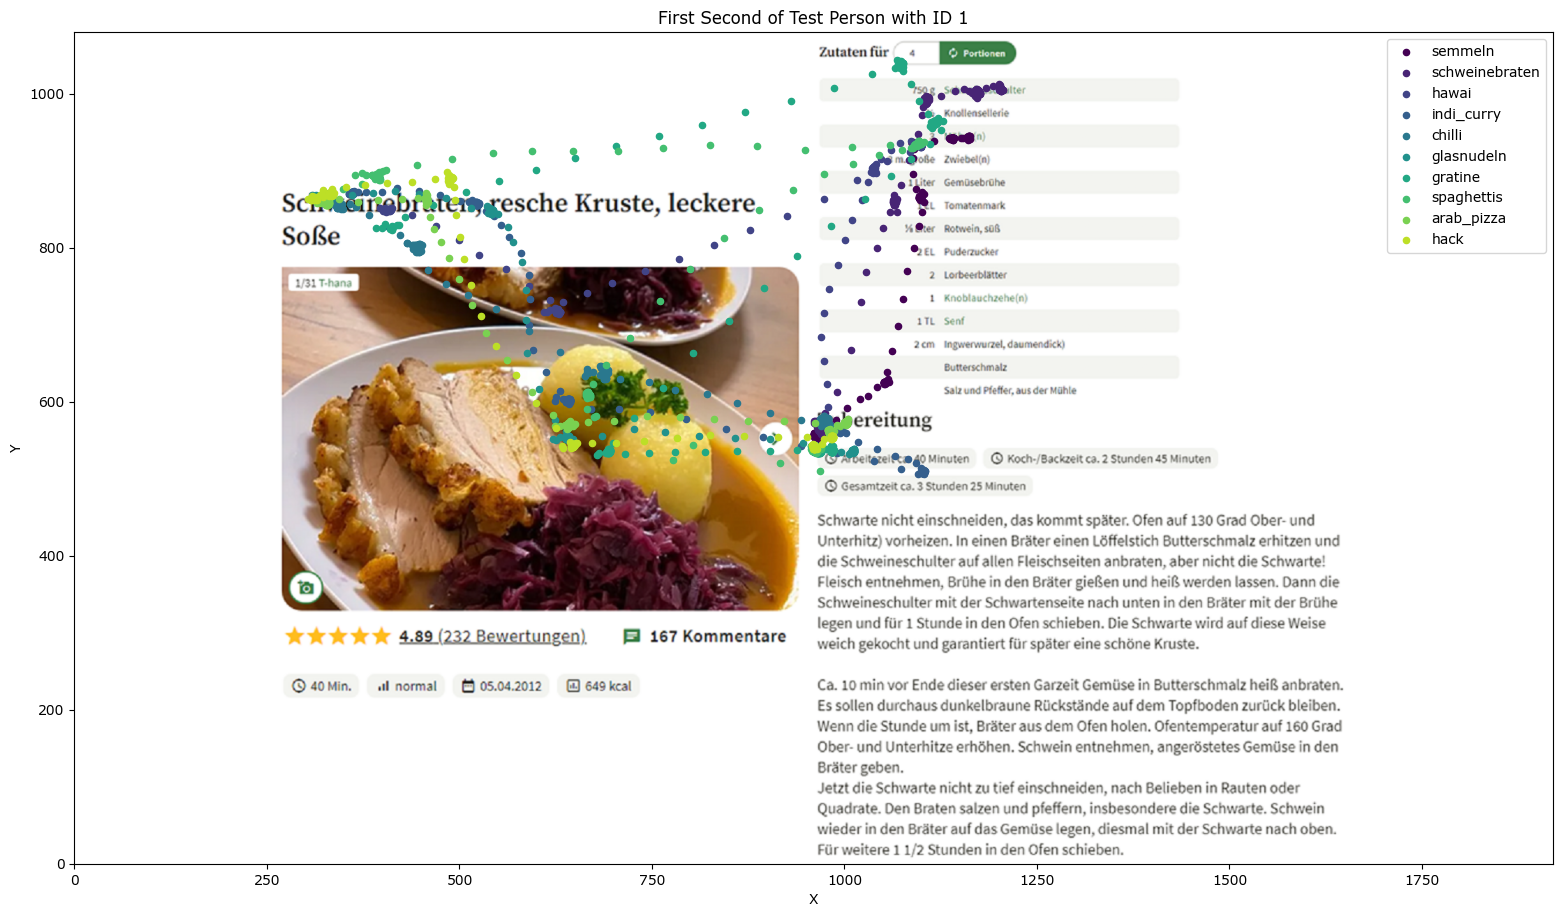

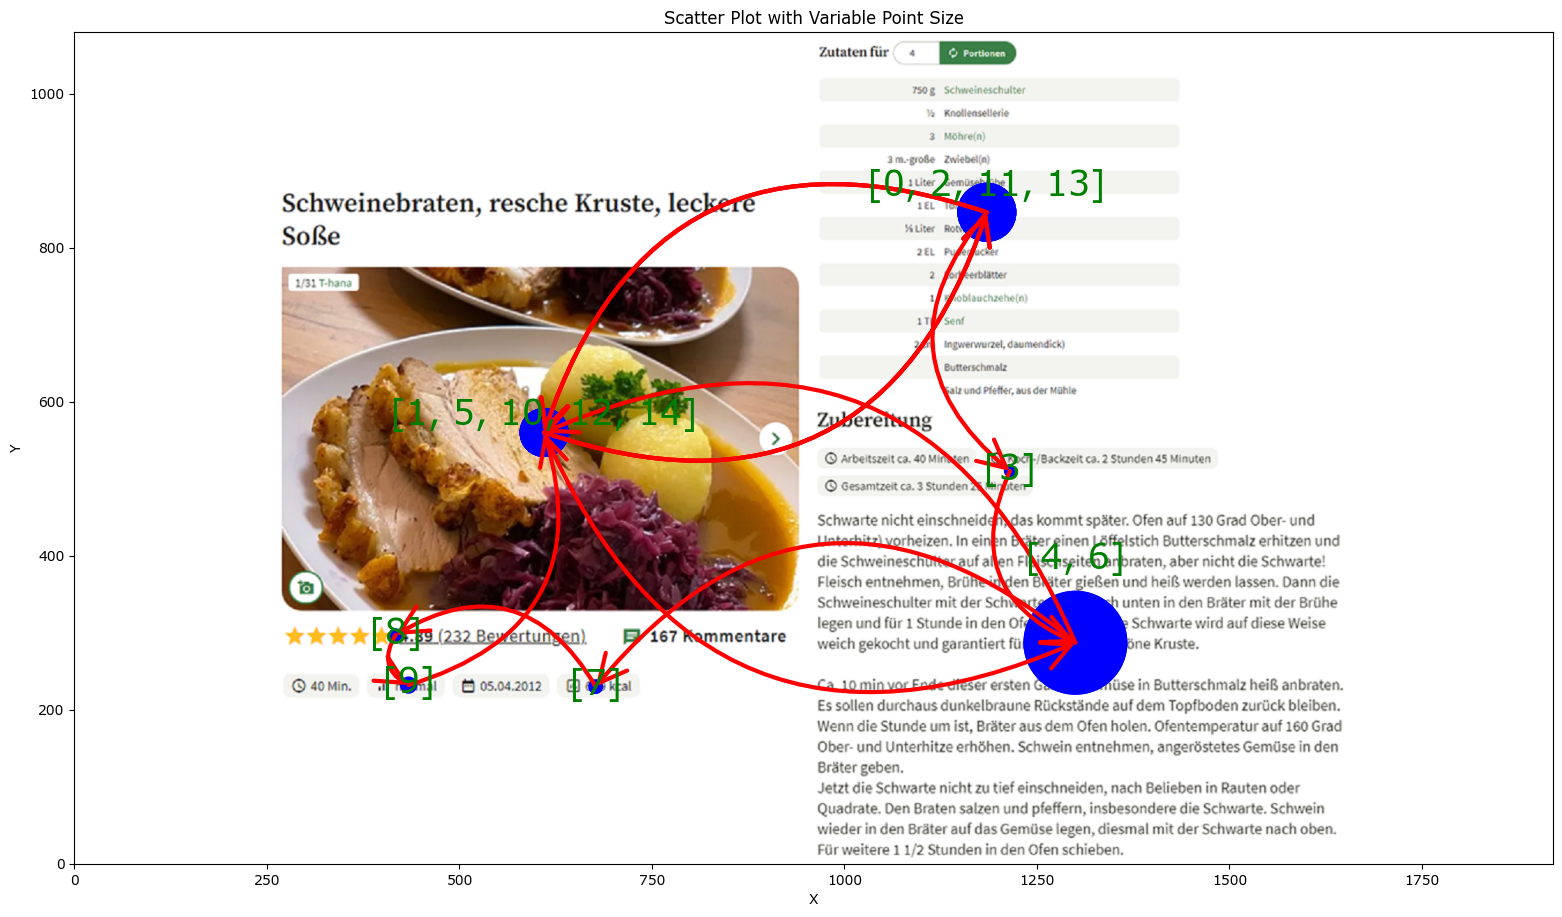

In [2]:
from set_eye_tracking_cooking_recipes.entities.test_data import TestData
from set_eye_tracking_cooking_recipes.entities.test_person import TestPerson
from set_eye_tracking_cooking_recipes.entities.test_aoi_metrics import TestAoiMetrics
from set_eye_tracking_cooking_recipes.entities.test import Test

test_data = TestData("../data/test_data/1_Johannes_Rothe.tsv")
test_person = TestPerson(surveys_file_path="../data/surveys.csv", id=test_data.id)
test_aoi_metrics = TestAoiMetrics("../data/aois/set_eye_tracking_cooking_recipes Metrics.tsv", test_data.id, test_person.name)
test = Test(test_person=test_person, test_data=test_data, test_aoimetrics=test_aoi_metrics)

test.plot_first_second_of_stimuli_visit()
#test.plot_aoi_sequence()

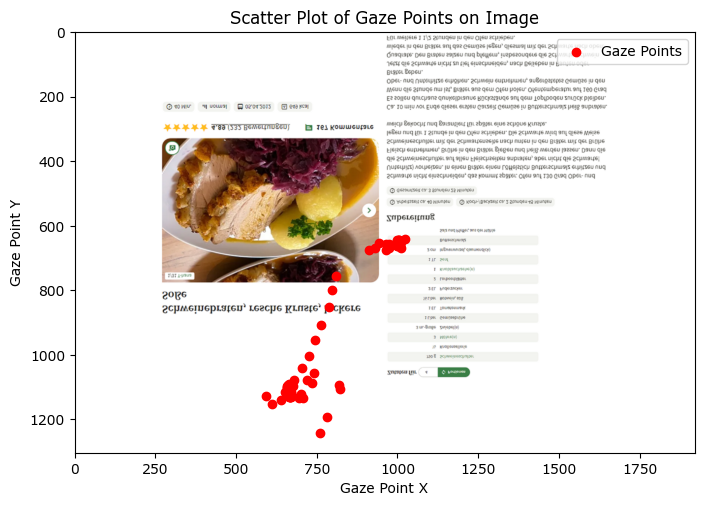

In [20]:
import numpy as np

import matplotlib.pyplot as plt

# Find the first 100 non-NaN values
valid_indices = np.where(~np.isnan(test_data.gaze_point_x) & ~np.isnan(test_data.gaze_point_y))[0][:100]

# Extract the corresponding data
timestamps_subset = test_data.recording_timestamp[valid_indices]
gaze_x_subset = test_data.gaze_point_x[valid_indices]
gaze_y_subset = test_data.gaze_point_y[valid_indices]

# Load the image
background_image = plt.imread("../data/stimuli/schweinebraten.png")

# Create a scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(background_image, extent=[0, 1920, 0, 1080])  # Set the extent based on your image size
ax.scatter(gaze_x_subset, gaze_y_subset, color='red', label='Gaze Points')

# Invert the y-axis to set the origin at the top-left corner
plt.gca().invert_yaxis()

ax.set_title('Scatter Plot of Gaze Points on Image')
ax.set_xlabel('Gaze Point X')
ax.set_ylabel('Gaze Point Y')

ax.legend()

plt.show()

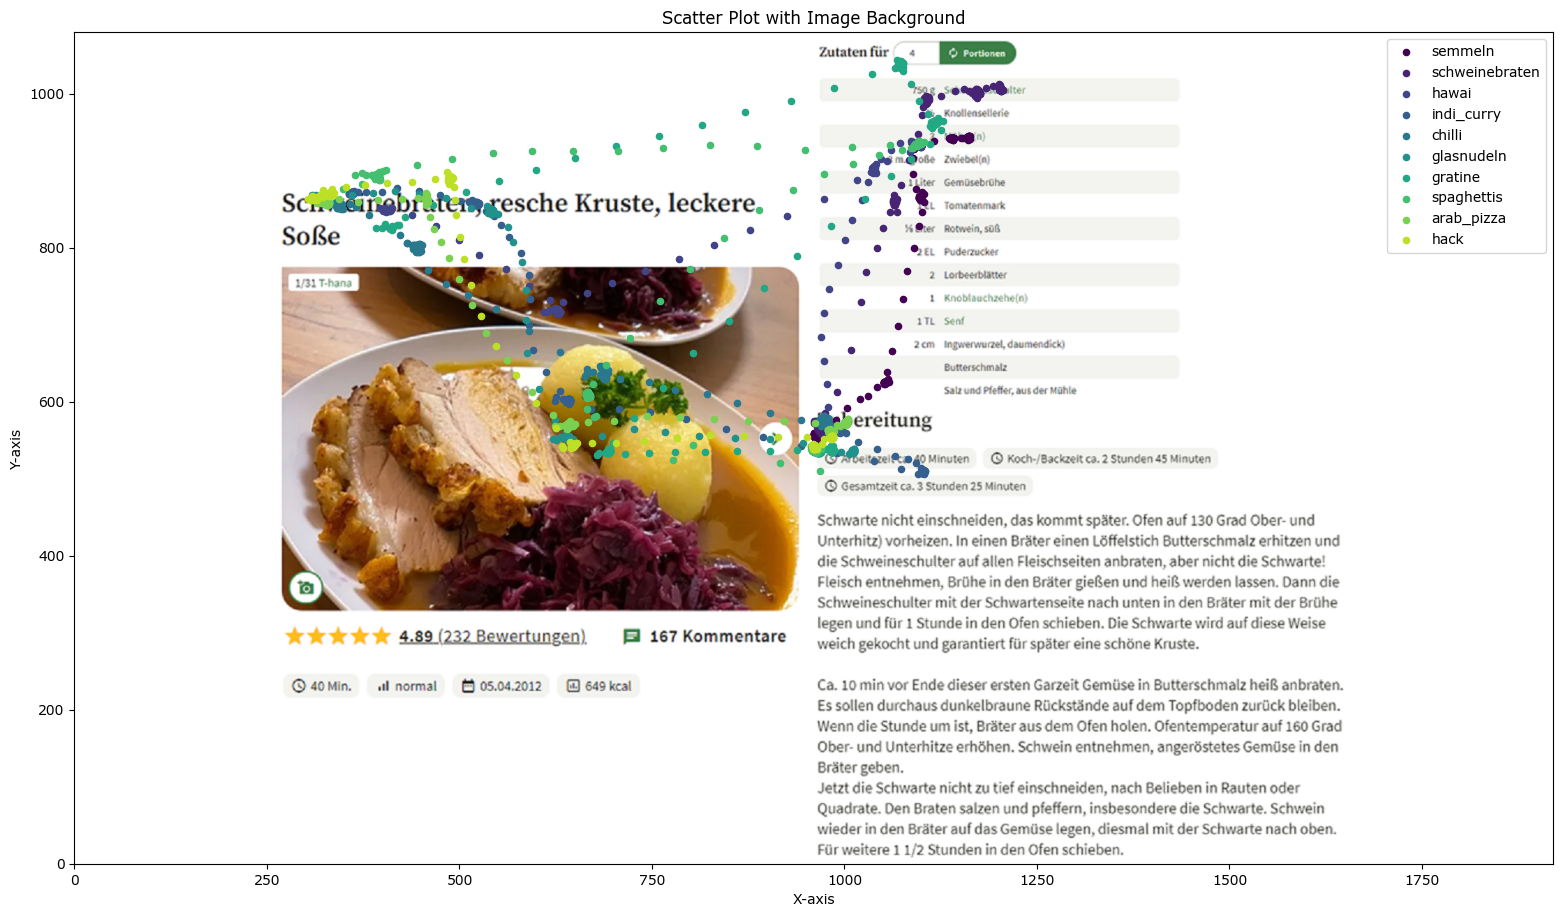

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

stimuli = ['semmeln', 'schweinebraten', 'hawai', 'indi_curry', 'chilli', 'glasnudeln', 'gratine', 'spaghettis', 'arab_pizza', 'hack']

# Load your image
img = mpimg.imread("../data/stimuli/schweinebraten.png")  # Replace 'your_image_path.jpg' with the path to your image

# Create a scatter plot
fig, ax = plt.subplots(figsize=(img.shape[1]/100, img.shape[0]/100))  # Set figsize based on image size
ax.imshow(img, extent=[0, img.shape[1], 0, img.shape[0]])

# Loop over stimuli and add scatter plot data with different colors
for i, stimulus in enumerate(stimuli):
    df_stimulus = test_data.get_stimuli_df(stimuli=stimulus)
    filtered_stimulus = df_stimulus[df_stimulus['Timestamps'] <= 1000000]
    inverted_y = img.shape[0] - filtered_stimulus["gaze_point_y"]
    
    # Choose a color for the scatter points
    color = plt.cm.viridis(i / len(stimuli))  # You can choose a different colormap
    
    # Add scatter plot data
    x = filtered_stimulus["gaze_point_x"]
    y = inverted_y
    ax.scatter(x, y, color=color, label=stimulus, s=20)  # Adjust 's' to change the size of scatter points

# Customize the plot if needed
ax.set_title('Scatter Plot with Image Background')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.legend()  # Add legend to show stimulus labels

# Show the plot
plt.show()


In [3]:
stimuli = ['semmeln', 'schweinebraten', 'hawai', 'indi_curry', 'chilli', 'glasnudeln', 'gratine', 'spaghettis', 'arab_pizza', 'hack']

df = test_data.get_stimuli_df(stimuli="semmeln")
print(df)



       Timestamps  gaze_point_x  gaze_point_y
0               0         964.0         532.0
1            3333         965.0         534.0
2            6666         964.0         533.0
3           10000         964.0         534.0
4           13331         963.0         532.0
...           ...           ...           ...
10291    34983472        1398.0         800.0
10292    34986806        1398.0         800.0
10293    34990140        1397.0         800.0
10294    34993472        1397.0         801.0
10295    34996807        1396.0         801.0

[10296 rows x 3 columns]
